In [1]:
# Importing all the modules 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
import joblib

In [2]:
#Reading Data
url="C:/Users/mohda/OneDrive/Desktop/Batch 94/10 March/Assignments/test/Data.csv"
data=pd.read_csv(url)
data.head()

,surface,rooms_new,zipcode_new,price_new,latitude,longitude
0,138.0,4.0,1060,420000,40.804673,-73.963420
1,130.0,5.0,1087,550000,52.355590,5.000561
2,116.0,5.0,1061,425000,52.373044,4.837568
3,92.0,5.0,1035,349511,52.416895,4.906767
4,127.0,4.0,1013,1050000,52.396789,4.876607


In [3]:
#Preprocessing of data
print('The number of rows & columns-',data.shape)

The number of rows & columns- (2187, 6)


In [4]:
print('The null value in data-\n',data.isnull().sum())

The null value in data-
 surface         0
rooms_new      28
zipcode_new     0
price_new       1
latitude        0
longitude       0
dtype: int64


In [5]:
#copy of original data
df=data.copy()
df.head()

,surface,rooms_new,zipcode_new,price_new,latitude,longitude
0,138.0,4.0,1060,420000,40.804673,-73.963420
1,130.0,5.0,1087,550000,52.355590,5.000561
2,116.0,5.0,1061,425000,52.373044,4.837568
3,92.0,5.0,1035,349511,52.416895,4.906767
4,127.0,4.0,1013,1050000,52.396789,4.876607


In [6]:
#Checking type of columns
print('The type of columns in data-\n', df.dtypes)

The type of columns in data-
 surface        float64
rooms_new      float64
zipcode_new      int64
price_new       object
latitude       float64
longitude      float64
dtype: object


In [7]:
#changing of columns type of price_new from object to float64

df['price_new'] = pd.to_numeric(df['price_new'], errors='coerce')


In [8]:
#permenantly drop the null values from the data 
df.isnull().sum()
df=df.dropna()

In [9]:
#After dropping the null value again checking the null values 
df.isnull().sum()

surface        0
rooms_new      0
zipcode_new    0
price_new      0
latitude       0
longitude      0
dtype: int64

In [10]:
#Droppping the NaN value
df.dropna(inplace=True)

# Multiple Linear Regression

In [11]:
#The latitude & longitude is not important to predict the value of house for the loctation we take zipcode

y=df['price_new']                        #Prediction variable 
x=df[['surface','rooms_new','zipcode_new',]] #dependent to do prediction

In [12]:
#It will give all the stats of variable x

x.describe()

,surface,rooms_new,zipcode_new
count,2154.000000,2154.000000,2154.000000
mean,108.718199,3.662024,1057.665274
std,69.487969,1.556783,29.065517
min,10.000000,0.000000,1011.000000
25%,65.000000,3.000000,1025.000000
50%,92.000000,3.000000,1061.000000
75%,130.000000,4.000000,1079.000000
max,690.000000,9.000000,1109.000000


In [13]:
#It will give all the stats of variable y

y.describe()

count    2.154000e+03
mean     6.033901e+05
std      6.198875e+05
min      2.250000e+04
25%      2.900000e+05
50%      4.000000e+05
75%      6.850000e+05
max      6.400000e+06
Name: price_new, dtype: float64

C:\Users\mohda\AppData\Local\Temp\ipykernel_3664\1238530195.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


surface        2.564193
rooms_new      0.910310
zipcode_new   -0.201527
price_new      4.149196
latitude      -6.018546
longitude     -6.019843
dtype: float64


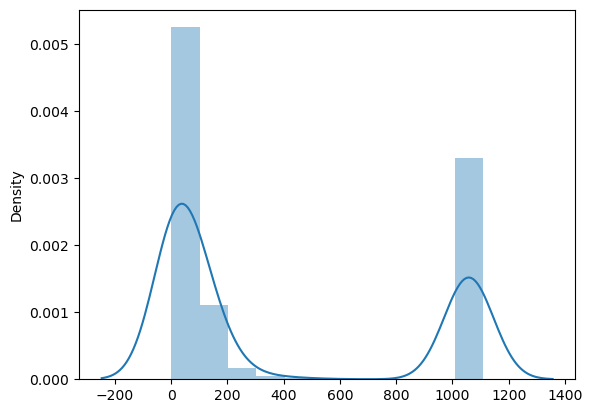

In [14]:
# Explotatory Data Analysis

sns.distplot(x)
print(df.skew())

C:\Users\mohda\AppData\Local\Temp\ipykernel_3664\47100933.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=y)


<Axes: ylabel='Density'>

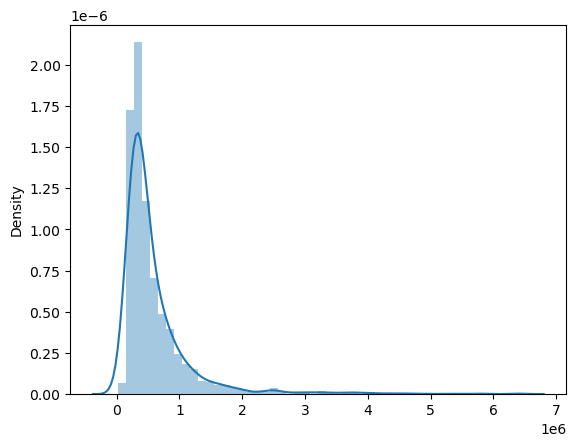

In [15]:
sns.distplot(x=y)

<Axes: >

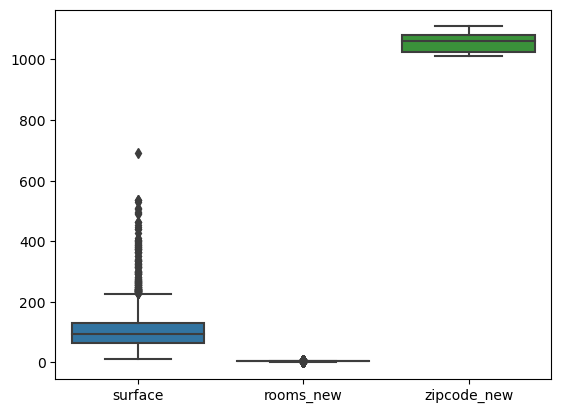

In [16]:
sns.boxplot(data=x)

<Axes: >

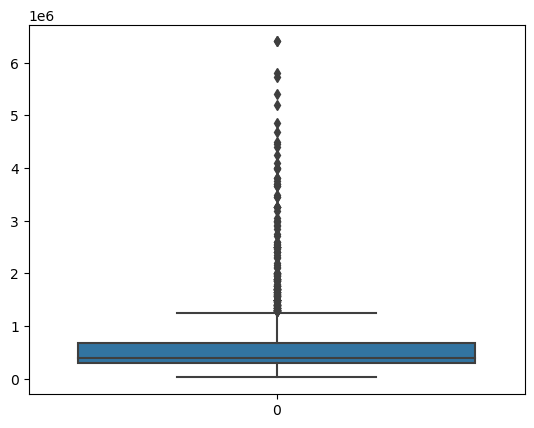

In [17]:
sns.boxplot(data=y)

In [18]:
#Sampling of data
#80% for training and 20% for testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
#total number of columns for training 
x_train.shape

(1723, 3)

In [20]:
#Modelling of Data
model=LinearRegression()
model_train=model.fit(x_train,y_train)
print('Model training is completed')

Model training is completed


In [21]:
#Validate Data
predic=model.predict(x_test)
print(predic)

[ 3.64017060e+05  6.41816065e+05  8.18685886e+04  9.92085528e+05
  8.22466618e+05  5.66226042e+05  9.75833634e+04  3.98809090e+05
  3.42017324e+05  4.94649643e+05  1.79352885e+05  8.35296082e+05
  2.56767107e+05  6.50049274e+05  1.65763921e+06  7.52273330e+05
  5.59469743e+05  2.78766843e+05  8.63790560e+04  2.54149349e+05
  5.42030181e+05  2.81310477e+05  1.02105832e+06  8.09475063e+05
  1.16419837e+06  1.71635481e+06  4.92558980e+05  6.09722838e+05
  3.78093924e+05  6.09722838e+05  1.55847313e+06  7.88089299e+05
  3.58395776e+05  8.50322762e+05  9.68342637e+05  1.39007863e+05
  1.73409599e+05  6.70497976e+05  5.84255159e+05  2.01831856e+06
  1.21622596e+06  1.06273762e+06  5.93921186e+05  4.81012996e+05
  3.16481354e+05  1.42160530e+06  7.28071636e+05  1.56236500e+05
  5.07051643e+05  8.38268269e+05  7.62355157e+05  2.76465255e+05
  6.87329400e+05  5.19317061e+05  3.51701937e+05  5.65736119e+05
  1.84425747e+06  5.30831706e+05  5.34362108e+05  4.38906234e+05
  3.95794118e+05  5.63018

In [22]:
#Check the accuracy
r2_score(predic,y_test)

0.7199912969596012

In [23]:
#The prediction from the Multiple Regression is around 60%

In [24]:
mean_squared_error(predic,y_test)

76678100540.30022

In [25]:
sqrt(mean_squared_error(predic,y_test))

276908.10847698234

In [26]:
#raw data


# KNN Regressor

In [27]:
#how to choose the value of k
error=[]
k=[]
for i in range(1,10):
    model= KNeighborsRegressor(n_neighbors=i)  #by default it is 5
    model_train=model.fit(x_train,y_train)
    er=round(1-model_train.score(x_train,y_train),2)
    error.append(er)
    k.append(i)
print(error)    

[0.0, 0.07, 0.12, 0.15, 0.15, 0.16, 0.16, 0.17, 0.17]


<Axes: xlabel='k', ylabel='error'>

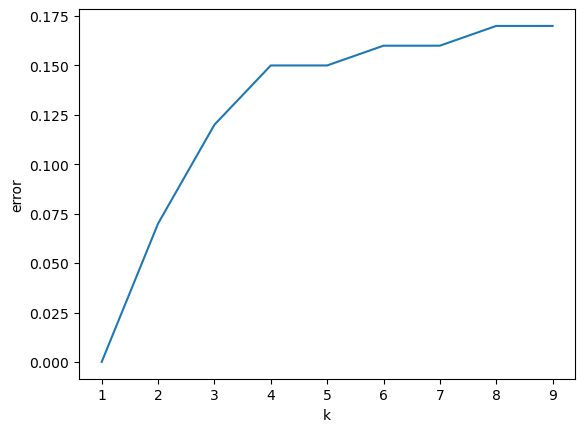

In [28]:
#using the elbow method finding the best k value
ds = pd.DataFrame({'k': k, 'error': error})
sns.lineplot(x='k',y='error',data=ds)

In [29]:
#Modelling of Data
#Best k value is 2
model= KNeighborsRegressor(n_neighbors=2) 
model_train=model.fit(x_train,y_train)
print('Model training is completed')

Model training is completed


In [30]:
#Validate Data
pred=model_train.predict(x_test)
pred

array([ 294750. ,  681250. ,  218750. ,  947500. , 1102500. ,  557500. ,
        190594.5,  230000. ,  425000. ,  528095. ,  309500. ,  627000. ,
        362500. ,  537500. , 2472500. ,  392000. ,  409250. ,  392250. ,
        247500. ,  325000. ,  547000. ,  202500. ,  530000. ,  712000. ,
       1026903. , 1567500. ,  345000. ,  617000. ,  187500. ,  617000. ,
       1512500. , 1037500. ,  224000. ,  795000. , 1022500. ,  261000. ,
        192500. ,  462000. ,  655000. , 2747500. , 1945000. , 1037500. ,
        635000. ,  267000. ,  322500. , 1122500. ,  860000. ,  312500. ,
        482500. ,  862500. ,  387000. ,  312500. ,  542500. ,  324750. ,
        297500. ,  487500. , 2600000. ,  537500. ,  342250. ,  199500. ,
        420000. ,  622000. ,  332500. , 1237500. ,  267000. ,  249400. ,
        290000. ,  215000. ,  124000. ,  312500. ,  512500. ,  562500. ,
        350000. ,  399250. ,  372000. ,  222500. , 1409403. ,  622500. ,
       2750000. ,  141250. ,  140500. ,  349250. , 

In [31]:
#Check the accuracy of model
r2_score(y_test,pred)

0.8257723042412227

In [32]:
#The prediction from the KNN Regression is around 84%

In [33]:
mean_squared_error(y_test,pred)

63649237788.564384

In [34]:
sqrt(mean_squared_error(y_test,pred))

252288.005637534

# Saving of Model

In [35]:
joblib.dump(model,'KNN_regV2.sav')

['KNN_regV2.sav']